In [170]:
#Import all necessary liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation, Dropout
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error

In [171]:
maindata = pd.read_csv(r"/mnt/data/projects/shop_distribution_model/data_process/data_mart_shop_all_shops_complete_202204.csv",sep=";")
maindata

/tmp/ipykernel_3215846/94075370.py:1: DtypeWarning: Columns (7,15) have mixed types. Specify dtype option on import or set low_memory=False.
  maindata = pd.read_csv(r"/mnt/data/projects/shop_distribution_model/data_process/data_mart_shop_all_shops_complete_202204.csv",sep=";")


,Unnamed: 0,rms_id,shop_name,shop_type,shop_type_id,sales_division,federal_state,zip,city,street,...,catch_area_sqkm_umts_2100_2,nbr_cellsumts_2100_3,pcvumts_2100_3,catch_area_sqkm_umts_2100_3,nbr_cellsgsm_1800,pcvgsm_1800,catch_area_sqkm_gsm_1800,nbr_cellsgsm_900,pcvgsm_900,catch_area_sqkm_gsm_900
0,0,200527558,Vodafone Shop Oberhausen,Partner shop,02 Vodafone-BPS,Niederlassung West,Nordrhein-Westfalen,46045,Oberhausen,Marktstr. 75,...,258.54,15.0,29.31,92.16,NaN,NaN,NaN,543.0,100.00,314.48
1,1,200527560,FH Ibrahim Yasar,Indirect shop,04 Vodafone-Fachhandel,Niederlassung West,Nordrhein-Westfalen,46145,Oberhausen,Bahnhofstr. 50,...,143.06,11.0,43.26,67.13,NaN,NaN,NaN,270.0,100.00,155.19
2,2,200527564,Vodafone Shop Xanten,Partner shop,02 Vodafone-BPS,Niederlassung West,Nordrhein-Westfalen,46509,Xanten,Marsstr. 24,...,782.38,10.0,2.60,23.20,4.0,2.35,20.93,225.0,100.00,891.02
3,3,200527565,Vodafone Shop Schermbeck,Partner shop,02 Vodafone-BPS,Niederlassung West,Nordrhein-Westfalen,46514,Schermbeck,Mittelstr. 66-70,...,577.93,23.0,15.87,124.76,NaN,NaN,NaN,344.0,99.61,783.03
4,4,200527566,Vodafone Shop Alpen,Partner shop,02 Vodafone-PA-Konzept,Niederlassung West,Nordrhein-Westfalen,46519,Alpen,Burgstr. 15,...,736.97,15.0,8.43,71.08,4.0,2.45,20.64,279.0,100.00,842.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441595,210808,203372081,Randy Nickel & Dennis Nickel GbR,Indirect shop,04 Vodafone-Fachhandel,Niederlassung Rhein-Main,Saarland,66113.0,Saarbrücken,Schillstr. 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
441596,210809,203372083,Randy Nickel & Dennis Nickel GbR,Indirect shop,04 Vodafone-Fachhandel,Niederlassung Rhein-Main,Saarland,66125.0,Saarbrücken,Am Markt 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
441597,210810,203372091,Ashop Solingen,Indirect shop,04 Vodafone-Fachhandel,Niederlassung West,Nordrhein-Westfalen,42697.0,Solingen,Düsseldorfer Str. 15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
441598,210811,203372094,Handyplanet,Indirect shop,04 Vodafone-Fachhandel,Niederlassung Rhein-Main,Hessen,35390.0,Gießen,Johannette-Lein-Gasse 18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
data = maindata.copy() #make a copy of original file

In [173]:
data2 = pd.read_excel("/mnt/data/projects/shop_distribution_model/data_mart_shop_columns.xlsx") #description of features 
data2

,shop_data_mart_column_en,shop_data_mart_column_en_v2,shop_data_mart_column_de,description_german,description_english,yoy_agg,aggregation,category,pandas_type,type,roundness,sorting,source,simu_recalc,prediction
0,rms_id,rms_id,rms_id,Shop Id,shop id,last,NaN,Shop information,str,str,NaN,1,Shop Master EXCEL,no,yes
1,name,shop_name,name,Shopbezeichnung,shop name,last,NaN,Shop information,str,str,NaN,2,Shop Master EXCEL,no,no
2,shop_type,shop_type,shoptyp,Shoptyp,shoptype,last,NaN,Shop information,str,str,NaN,3,Shop Master EXCEL,no,yes
3,shop_type_id,shop_type_id,shoptyp_id,Shoptyp id,shoptype id,last,NaN,Shop information,str,str,NaN,4,Shop Master EXCEL,no,yes
4,division,sales_division,division,"Division des Shops (Nord, Ost, Süd, West)",shop divison,last,NaN,Shop information,str,str,NaN,5,Shop Master EXCEL,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,pcvgsm_1800,pcvgsm_1800,pcvgsm_1800,Prozentualer Anteil der GSM 1800 Abdeckung,NaN,last,NaN,Network Data,float,int,2.0,227,NaN,NaN,yes
227,catch_area_sqkm_gsm_1800,catch_area_sqkm_gsm_1800,catch_area_sqkm_gsm_1800,Größe der Fläche der GSM 1800 Abdeckung im Ein...,NaN,last,NaN,Network Data,float,int,2.0,228,NaN,NaN,yes
228,nbr_cellsgsm_900,nbr_cellsgsm_900,nbr_cellsgsm_900,Anzahl an GSM 900 Zellen in dem Einzugsgebiet,NaN,last,NaN,Network Data,float,int,NaN,229,NaN,NaN,yes
229,pcvgsm_900,pcvgsm_900,pcvgsm_900,Prozentualer Anteil der GSM 900 Abdeckung,NaN,last,NaN,Network Data,float,int,2.0,230,NaN,NaN,yes


In [174]:
df_new = data2[['shop_data_mart_column_en_v2', 'prediction']]
df_new #Consider only the columns which has prediction = yes

,shop_data_mart_column_en_v2,prediction
0,rms_id,yes
1,shop_name,no
2,shop_type,yes
3,shop_type_id,yes
4,sales_division,yes
...,...,...
226,pcvgsm_1800,yes
227,catch_area_sqkm_gsm_1800,yes
228,nbr_cellsgsm_900,yes
229,pcvgsm_900,yes


In [175]:
final_data = data.loc[:,['rms_id','shop_type','shop_type_id','sales_division','federal_state','zip','city','street','dealer_lon','dealer_lat','shop_size_sqm_total','sales_area_sqm',
            'front_length_type','front_description','macrolayer','shop_status','rental_status','design_status','brickmortar_flg',
            'real_shop_flg','soho_flg','special_brands_flg','repair_service_flg','shop_site_id','operator','operator_id','catchment_in_sqm',
            'nearest_own_dist','nearest_partner_dist','own_shop_size_sqm_total','own_sales_area_sqm','own_frequenz','own_days','partner_shop_size_sqm_total',
            'partner_sales_area_sqm','partner_frequenz','partner_days','count_own_shops','count_partner','count_vf_shops','telekom_ownshop_count',
            'telekom_pa_count','o2_ownshop_count','o2_pa_count','competitor_count','visitor_frequency','days_frequency',
            'inflow_mobile','mob_subprl','inflow_dsl','inflow_cable','mean_cst_shop_distance','mean_age_cst','onl_mob_inflow','onl_mob_subprl',
            'onl_dsl_inflow','onl_cab_inflow','onl_avg_age_cst','comsns_total','opex_rent','opex_payroll','opex_other','opex_total',
            'shop_rent','rev_total','cost_total','contribution_margin','service_revenue','google_rating','google_rating_count','google_rating_ratio',
            'nof_nonuser','nof_storno','nof_complaint','nof_cont','tnps_nps_resp','tnps_nps_pro','tnps_nps_det','tnps_nss','gstar_val_sum',
            'gstar_resp','gstar_mean','nof_vor','netperform_users','netpf_avg_age_seg','netpf_avg_age','netpf_avg_age_vf_stars','netpf_inplz',
            'netpf_inplz_pct','netpf_shop_zip_pp','netpf_visitors_pp','netpf_avg_arpu','netpf_sum_arpu','netpf_visit_product','netpf_visit_prices',
            'netpf_contract_cycle','netpf_months_since_act','netpf_nbr_nofc','netpf_pct_nofc','netpf_nbr_cable','netpf_pct_cable',
            'netpf_nbr_subprl','netpf_pct_subprl','netpf_pct_winbacks','netpf_passers','netpf_visitors','hh','ew_hh','kk_idx','ra_1','ra_2',
            'ra_3','ra_4','ra_5','ra_6','resint','resint_sqkm','res_m','res_f','resint_0014','resint_1524','resint_2549','resint_5064','resint_65',
            'res_foreigners','lte_nbr_cells','lte_lte_area_sqkm','lte_pct_cov','umts_nbr_cells','umts_umts_area_sqkm','umts_pct_cov','gsm_nbr_cells',
            'gsm_gsm_area_sqkm','gsm_pct_gsm_cov','nbr_cellslte_800','pcvlte_800','catch_area_sqkm_lte_800','nbr_cellslte_1800',
            'pcvlte_1800','catch_area_sqkm_lte_1800','nbr_cellslte_2100','pcvlte_2100','catch_area_sqkm_lte_2100','nbr_cellslte_2600',
            'pcvlte_2600','catch_area_sqkm_lte_2600','nbr_cellsumts_2100_1','pcvumts_2100_1','catch_area_sqkm_umts_2100_1','nbr_cellsumts_2100_2',
            'pcvumts_2100_2','catch_area_sqkm_umts_2100_2','nbr_cellsumts_2100_3','pcvumts_2100_3','catch_area_sqkm_umts_2100_3','nbr_cellsgsm_1800',
            'pcvgsm_1800','catch_area_sqkm_gsm_1800','nbr_cellsgsm_900','pcvgsm_900','catch_area_sqkm_gsm_900','calmonth']]
final_data

,rms_id,shop_type,shop_type_id,sales_division,federal_state,zip,city,street,dealer_lon,dealer_lat,...,nbr_cellsumts_2100_3,pcvumts_2100_3,catch_area_sqkm_umts_2100_3,nbr_cellsgsm_1800,pcvgsm_1800,catch_area_sqkm_gsm_1800,nbr_cellsgsm_900,pcvgsm_900,catch_area_sqkm_gsm_900,calmonth
0,200527558,Partner shop,02 Vodafone-BPS,Niederlassung West,Nordrhein-Westfalen,46045,Oberhausen,Marktstr. 75,6.854367,51.468814,...,15.0,29.31,92.16,NaN,NaN,NaN,543.0,100.00,314.48,202010.0
1,200527560,Indirect shop,04 Vodafone-Fachhandel,Niederlassung West,Nordrhein-Westfalen,46145,Oberhausen,Bahnhofstr. 50,6.847591,51.514868,...,11.0,43.26,67.13,NaN,NaN,NaN,270.0,100.00,155.19,202010.0
2,200527564,Partner shop,02 Vodafone-BPS,Niederlassung West,Nordrhein-Westfalen,46509,Xanten,Marsstr. 24,6.455259,51.660313,...,10.0,2.60,23.20,4.0,2.35,20.93,225.0,100.00,891.02,202010.0
3,200527565,Partner shop,02 Vodafone-BPS,Niederlassung West,Nordrhein-Westfalen,46514,Schermbeck,Mittelstr. 66-70,6.873224,51.693933,...,23.0,15.87,124.76,NaN,NaN,NaN,344.0,99.61,783.03,202010.0
4,200527566,Partner shop,02 Vodafone-PA-Konzept,Niederlassung West,Nordrhein-Westfalen,46519,Alpen,Burgstr. 15,6.511817,51.575760,...,15.0,8.43,71.08,4.0,2.45,20.64,279.0,100.00,842.89,202010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441595,203372081,Indirect shop,04 Vodafone-Fachhandel,Niederlassung Rhein-Main,Saarland,66113.0,Saarbrücken,Schillstr. 1,6.971168,49.243750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202009.0
441596,203372083,Indirect shop,04 Vodafone-Fachhandel,Niederlassung Rhein-Main,Saarland,66125.0,Saarbrücken,Am Markt 1,7.037261,49.275467,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202009.0
441597,203372091,Indirect shop,04 Vodafone-Fachhandel,Niederlassung West,Nordrhein-Westfalen,42697.0,Solingen,Düsseldorfer Str. 15,7.002430,51.161256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202009.0
441598,203372094,Indirect shop,04 Vodafone-Fachhandel,Niederlassung Rhein-Main,Hessen,35390.0,Gießen,Johannette-Lein-Gasse 18,8.670732,50.585654,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202009.0


In [176]:
final_data['shop_type'].unique()

array(['Partner shop', 'Indirect shop', 'Own shop', 'Other', nan],
      dtype=object)

In [177]:
final_data = final_data[final_data.shop_type != 'Other']  #not including other shop_types
final_data

,rms_id,shop_type,shop_type_id,sales_division,federal_state,zip,city,street,dealer_lon,dealer_lat,...,nbr_cellsumts_2100_3,pcvumts_2100_3,catch_area_sqkm_umts_2100_3,nbr_cellsgsm_1800,pcvgsm_1800,catch_area_sqkm_gsm_1800,nbr_cellsgsm_900,pcvgsm_900,catch_area_sqkm_gsm_900,calmonth
0,200527558,Partner shop,02 Vodafone-BPS,Niederlassung West,Nordrhein-Westfalen,46045,Oberhausen,Marktstr. 75,6.854367,51.468814,...,15.0,29.31,92.16,NaN,NaN,NaN,543.0,100.00,314.48,202010.0
1,200527560,Indirect shop,04 Vodafone-Fachhandel,Niederlassung West,Nordrhein-Westfalen,46145,Oberhausen,Bahnhofstr. 50,6.847591,51.514868,...,11.0,43.26,67.13,NaN,NaN,NaN,270.0,100.00,155.19,202010.0
2,200527564,Partner shop,02 Vodafone-BPS,Niederlassung West,Nordrhein-Westfalen,46509,Xanten,Marsstr. 24,6.455259,51.660313,...,10.0,2.60,23.20,4.0,2.35,20.93,225.0,100.00,891.02,202010.0
3,200527565,Partner shop,02 Vodafone-BPS,Niederlassung West,Nordrhein-Westfalen,46514,Schermbeck,Mittelstr. 66-70,6.873224,51.693933,...,23.0,15.87,124.76,NaN,NaN,NaN,344.0,99.61,783.03,202010.0
4,200527566,Partner shop,02 Vodafone-PA-Konzept,Niederlassung West,Nordrhein-Westfalen,46519,Alpen,Burgstr. 15,6.511817,51.575760,...,15.0,8.43,71.08,4.0,2.45,20.64,279.0,100.00,842.89,202010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441595,203372081,Indirect shop,04 Vodafone-Fachhandel,Niederlassung Rhein-Main,Saarland,66113.0,Saarbrücken,Schillstr. 1,6.971168,49.243750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202009.0
441596,203372083,Indirect shop,04 Vodafone-Fachhandel,Niederlassung Rhein-Main,Saarland,66125.0,Saarbrücken,Am Markt 1,7.037261,49.275467,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202009.0
441597,203372091,Indirect shop,04 Vodafone-Fachhandel,Niederlassung West,Nordrhein-Westfalen,42697.0,Solingen,Düsseldorfer Str. 15,7.002430,51.161256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202009.0
441598,203372094,Indirect shop,04 Vodafone-Fachhandel,Niederlassung Rhein-Main,Hessen,35390.0,Gießen,Johannette-Lein-Gasse 18,8.670732,50.585654,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202009.0


In [178]:
final_data['shop_type'].unique()

array(['Partner shop', 'Indirect shop', 'Own shop', nan], dtype=object)

In [179]:
final_data['calmonth'].dtype

dtype('float64')

In [180]:
final_data['calmonth']=final_data['calmonth'].astype('int64') #change dtype

/tmp/ipykernel_3215846/1344418257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['calmonth']=final_data['calmonth'].astype('int64') #change dtype


In [181]:
def process_calmonth(final_data):
    final_data['calmonth'] = final_data['calmonth'].apply(lambda x: str(x)[0:4]+ "-" +  str(x)[4:])  # set date column in proper format
    final_data.sort_values(by='calmonth', inplace=True)  # sort the dates
    final_data['calmonth'] = final_data['calmonth'].apply(lambda x: str(x)[-2:])  # set date column in proper format
    final_data['calmonth'] = final_data['calmonth'].astype('int64')  # change dtype to int64
    return final_data['calmonth']

result = process_calmonth(final_data)
print(result)

/tmp/ipykernel_3215846/878620754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['calmonth'] = final_data['calmonth'].apply(lambda x: str(x)[0:4]+ "-" +  str(x)[4:])  # set date column in proper format


277899    6
354703    6
369107    6
268409    6
331511    6
         ..
225001    4
224999    4
224998    4
225013    4
222112    4
Name: calmonth, Length: 438196, dtype: int64


/tmp/ipykernel_3215846/878620754.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.sort_values(by='calmonth', inplace=True)  # sort the dates
/tmp/ipykernel_3215846/878620754.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['calmonth'] = final_data['calmonth'].apply(lambda x: str(x)[-2:])  # set date column in proper format
/tmp/ipykernel_3215846/878620754.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [182]:
# Columns having missing values
missing_columns = [col for col in final_data.columns if final_data[col].isnull().sum() > 0]
missing_columns

['shop_type',
 'shop_type_id',
 'federal_state',
 'zip',
 'city',
 'street',
 'dealer_lon',
 'dealer_lat',
 'front_description',
 'macrolayer',
 'shop_status',
 'rental_status',
 'design_status',
 'shop_site_id',
 'operator',
 'operator_id',
 'catchment_in_sqm',
 'nearest_own_dist',
 'nearest_partner_dist',
 'own_shop_size_sqm_total',
 'own_sales_area_sqm',
 'own_frequenz',
 'own_days',
 'partner_shop_size_sqm_total',
 'partner_sales_area_sqm',
 'partner_frequenz',
 'partner_days',
 'count_own_shops',
 'count_partner',
 'count_vf_shops',
 'telekom_ownshop_count',
 'telekom_pa_count',
 'o2_ownshop_count',
 'o2_pa_count',
 'competitor_count',
 'visitor_frequency',
 'days_frequency',
 'inflow_mobile',
 'mob_subprl',
 'inflow_dsl',
 'inflow_cable',
 'mean_cst_shop_distance',
 'mean_age_cst',
 'onl_mob_inflow',
 'onl_mob_subprl',
 'onl_dsl_inflow',
 'onl_cab_inflow',
 'onl_avg_age_cst',
 'comsns_total',
 'opex_rent',
 'opex_payroll',
 'opex_other',
 'opex_total',
 'shop_rent',
 'rev_total',

In [183]:
#function to check the missing columns percenatge
def get_numerical_summary(final_data):
    total = final_data.shape[0]
    missing_columns = [col for col in final_data.columns if final_data[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = final_data[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent

# Check the missing values with percentage 
missing_percent = get_numerical_summary(final_data)

shop_type : 20176 (4.604%)
shop_type_id : 21190 (4.836%)
federal_state : 157 (0.036%)
zip : 21190 (4.836%)
city : 21190 (4.836%)
street : 21190 (4.836%)
dealer_lon : 21252 (4.85%)
dealer_lat : 21252 (4.85%)
front_description : 433779 (98.992%)
macrolayer : 1194 (0.272%)
shop_status : 32 (0.007%)
rental_status : 10134 (2.313%)
design_status : 16558 (3.779%)
shop_site_id : 48695 (11.113%)
operator : 6228 (1.421%)
operator_id : 48695 (11.113%)
catchment_in_sqm : 182835 (41.724%)
nearest_own_dist : 20196 (4.609%)
nearest_partner_dist : 20280 (4.628%)
own_shop_size_sqm_total : 25996 (5.933%)
own_sales_area_sqm : 25996 (5.933%)
own_frequenz : 178703 (40.782%)
own_days : 178703 (40.782%)
partner_shop_size_sqm_total : 26810 (6.118%)
partner_sales_area_sqm : 26810 (6.118%)
partner_frequenz : 127587 (29.116%)
partner_days : 127587 (29.116%)
count_own_shops : 182835 (41.724%)
count_partner : 182835 (41.724%)
count_vf_shops : 182835 (41.724%)
telekom_ownshop_count : 182835 (41.724%)
telekom_pa_cou

In [184]:
df_temp = final_data.copy()

In [185]:
# Threshold to remove attribute having missing values greater than threshold 
ATTRIBUTE_THRESHOLD = 75 #75% in this case 

for col, per in missing_percent.items():
    if per > ATTRIBUTE_THRESHOLD:
        df_temp.drop(col, axis=1 ,inplace = True)

In [186]:
df_temp

,rms_id,shop_type,shop_type_id,sales_division,federal_state,zip,city,street,dealer_lon,dealer_lat,...,nbr_cellsumts_2100_2,pcvumts_2100_2,catch_area_sqkm_umts_2100_2,nbr_cellsumts_2100_3,pcvumts_2100_3,catch_area_sqkm_umts_2100_3,nbr_cellsgsm_900,pcvgsm_900,catch_area_sqkm_gsm_900,calmonth
277899,200560910,Partner shop,NaN,Niederlassung Nord,Schleswig-Holstein,NaN,NaN,NaN,NaN,NaN,...,38.0,24.45,74.85,34.0,24.60,75.31,555.0,100.00,306.07,6
354703,203356495,Indirect shop,04 Vodafone-Fachhandel,Niederlassung Nord,Niedersachsen,27283.0,Verden,Große Str. 95,9.229076,52.919611,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
369107,203368437,Indirect shop,04 Vodafone-Fachhandel,Niederlassung Ost,Sachsen,1099.0,Dresden,Königsbrücker Str. 56,13.749542,51.069818,...,849.0,77.68,1285.56,142.0,35.37,585.34,731.0,99.71,1650.16,6
268409,200533748,Own shop,01 Vodafone-MFS-Store (RED-Store),Niederlassung Nord,Niedersachsen,38100.0,Braunschweig,Sack 23,10.521706,52.264530,...,103.0,74.60,582.43,18.0,19.87,155.15,256.0,100.00,780.79,6
331511,203345326,Indirect shop,04 Vodafone-Fachhandel,Niederlassung Ost,Sachsen,4229.0,Leipzig,Könneritzstr. 54,12.343202,51.323153,...,302.0,87.39,564.45,51.0,62.88,406.17,251.0,99.96,645.66,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225001,203333501,Indirect shop,04 Vodafone-Fachhandel,Niederlassung Ost,Thüringen,99099,Erfurt,Rudolstädter Str. 315,11.103619,50.951750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
224999,203333480,Indirect shop,04 Vodafone-Fachhandel,Niederlassung Nord-West,Niedersachsen,37574,Einbeck,Lange Brücke 12,9.869112,51.818138,...,29.0,45.03,221.95,NaN,NaN,NaN,63.0,99.02,488.02,4
224998,203333473,Own shop,01 Vodafone-Filiale,Niederlassung Rhein-Main,Bayern,97070,Würzburg,Schönbornstr. 4,9.931155,49.795450,...,18.0,11.58,112.54,NaN,NaN,NaN,339.0,98.55,958.01,4
225013,203333697,Indirect shop,04 Vodafone-Fachhandel,Niederlassung Nord,Niedersachsen,29313,Hambühren,Sudermannstr. 2,9.959124,52.633473,...,72.0,48.00,162.00,1.0,1.29,4.36,84.0,100.00,337.51,4


In [187]:
#Check categorical features 
cat_var = [feature for feature in df_temp.columns if df_temp[feature].dtypes == 'O']

for feature in cat_var:
    df_temp[feature] = df_temp[feature].fillna(df_temp[feature].value_counts().idxmax()) # fill null value with idxmax

df_temp[cat_var].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438196 entries, 277899 to 222112
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   shop_type          438196 non-null  object
 1   shop_type_id       438196 non-null  object
 2   sales_division     438196 non-null  object
 3   federal_state      438196 non-null  object
 4   zip                438196 non-null  object
 5   city               438196 non-null  object
 6   street             438196 non-null  object
 7   front_length_type  438196 non-null  object
 8   macrolayer         438196 non-null  object
 9   shop_status        438196 non-null  object
 10  rental_status      438196 non-null  object
 11  design_status      438196 non-null  object
 12  shop_site_id       438196 non-null  object
 13  operator           438196 non-null  object
dtypes: object(14)
memory usage: 50.1+ MB


In [188]:
#Chcek numerical features in dataset
num_var = [feature for feature in df_temp.columns if df_temp[feature].dtypes != 'O']
df_temp[num_var] = df_temp[num_var].fillna(df_temp[num_var].median()) # fill null value with median

#chcek the info()
df_temp[num_var].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438196 entries, 277899 to 222112
Data columns (total 95 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   rms_id                       438196 non-null  int64  
 1   dealer_lon                   438196 non-null  float64
 2   dealer_lat                   438196 non-null  float64
 3   shop_size_sqm_total          438196 non-null  float64
 4   sales_area_sqm               438196 non-null  float64
 5   brickmortar_flg              438196 non-null  int64  
 6   real_shop_flg                438196 non-null  int64  
 7   soho_flg                     438196 non-null  int64  
 8   special_brands_flg           438196 non-null  int64  
 9   repair_service_flg           438196 non-null  int64  
 10  operator_id                  438196 non-null  float64
 11  catchment_in_sqm             438196 non-null  float64
 12  nearest_own_dist             438196 non-null  float64

In [189]:
objList = df_temp.select_dtypes(include = "object").columns
print (objList)

Index(['shop_type', 'shop_type_id', 'sales_division', 'federal_state', 'zip',
       'city', 'street', 'front_length_type', 'macrolayer', 'shop_status',
       'rental_status', 'design_status', 'shop_site_id', 'operator'],
      dtype='object')


In [190]:
le = LabelEncoder()

# Encode the "ShopType" column
df_temp["shop_type"] = le.fit_transform(df_temp["shop_type"].astype(str))

print("Mapping for ShopType:\n")
for code, value in enumerate(le.classes_):
    print(f"Encoded value {code}: {value}")

Mapping for ShopType:

Encoded value 0: Indirect shop
Encoded value 1: Own shop
Encoded value 2: Partner shop


In [191]:
date_column = 'calmonth' 

obj_List = df_temp.select_dtypes(include='object').columns
obj_List = obj_List[obj_List != date_column]
obj_List

Index(['shop_type_id', 'sales_division', 'federal_state', 'zip', 'city',
       'street', 'front_length_type', 'macrolayer', 'shop_status',
       'rental_status', 'design_status', 'shop_site_id', 'operator'],
      dtype='object')

In [192]:
le = LabelEncoder()

for feat in objList:
    if feat != date_column:
        df_temp[feat] = le.fit_transform(df_temp[feat].astype(str))

print(df_temp.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438196 entries, 277899 to 222112
Columns: 109 entries, rms_id to calmonth
dtypes: float64(88), int64(21)
memory usage: 367.7 MB
None


In [193]:
df_temp

,rms_id,shop_type,shop_type_id,sales_division,federal_state,zip,city,street,dealer_lon,dealer_lat,...,nbr_cellsumts_2100_2,pcvumts_2100_2,catch_area_sqkm_umts_2100_2,nbr_cellsumts_2100_3,pcvumts_2100_3,catch_area_sqkm_umts_2100_3,nbr_cellsgsm_900,pcvgsm_900,catch_area_sqkm_gsm_900,calmonth
277899,200560910,2,10,1,14,3862,260,1030,9.498022,51.154263,...,38.0,24.45,74.85,34.0,24.60,75.31,555.0,100.00,306.07,6
354703,203356495,0,10,1,8,1492,2351,3876,9.229076,52.919611,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,6
369107,203368437,0,10,4,12,344,538,6430,13.749542,51.069818,...,849.0,77.68,1285.56,142.0,35.37,585.34,731.0,99.71,1650.16,6
268409,200533748,1,2,1,8,2243,347,9482,10.521706,52.264530,...,103.0,74.60,582.43,18.0,19.87,155.15,256.0,100.00,780.79,6
331511,203345326,0,10,4,12,2546,1336,6483,12.343202,51.323153,...,302.0,87.39,564.45,51.0,62.88,406.17,251.0,99.96,645.66,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225001,203333501,0,10,4,15,6347,636,9377,11.103619,50.951750,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,4
224999,203333480,0,10,3,8,2229,588,6549,9.869112,51.818138,...,29.0,45.03,221.95,16.0,24.02,105.91,63.0,99.02,488.02,4
224998,203333473,1,1,5,1,6200,2595,9915,9.931155,49.795450,...,18.0,11.58,112.54,16.0,24.02,105.91,339.0,98.55,958.01,4
225013,203333697,0,10,1,8,1657,932,10512,9.959124,52.633473,...,72.0,48.00,162.00,1.0,1.29,4.36,84.0,100.00,337.51,4


In [194]:
df_temp.reset_index(inplace=True)

In [195]:
df_temp

,index,rms_id,shop_type,shop_type_id,sales_division,federal_state,zip,city,street,dealer_lon,...,nbr_cellsumts_2100_2,pcvumts_2100_2,catch_area_sqkm_umts_2100_2,nbr_cellsumts_2100_3,pcvumts_2100_3,catch_area_sqkm_umts_2100_3,nbr_cellsgsm_900,pcvgsm_900,catch_area_sqkm_gsm_900,calmonth
0,277899,200560910,2,10,1,14,3862,260,1030,9.498022,...,38.0,24.45,74.85,34.0,24.60,75.31,555.0,100.00,306.07,6
1,354703,203356495,0,10,1,8,1492,2351,3876,9.229076,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,6
2,369107,203368437,0,10,4,12,344,538,6430,13.749542,...,849.0,77.68,1285.56,142.0,35.37,585.34,731.0,99.71,1650.16,6
3,268409,200533748,1,2,1,8,2243,347,9482,10.521706,...,103.0,74.60,582.43,18.0,19.87,155.15,256.0,100.00,780.79,6
4,331511,203345326,0,10,4,12,2546,1336,6483,12.343202,...,302.0,87.39,564.45,51.0,62.88,406.17,251.0,99.96,645.66,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438191,225001,203333501,0,10,4,15,6347,636,9377,11.103619,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,4
438192,224999,203333480,0,10,3,8,2229,588,6549,9.869112,...,29.0,45.03,221.95,16.0,24.02,105.91,63.0,99.02,488.02,4
438193,224998,203333473,1,1,5,1,6200,2595,9915,9.931155,...,18.0,11.58,112.54,16.0,24.02,105.91,339.0,98.55,958.01,4
438194,225013,203333697,0,10,1,8,1657,932,10512,9.959124,...,72.0,48.00,162.00,1.0,1.29,4.36,84.0,100.00,337.51,4


In [196]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438196 entries, 0 to 438195
Columns: 110 entries, index to calmonth
dtypes: float64(88), int64(22)
memory usage: 367.7 MB


In [197]:
# Create the training set
groups = df_temp.groupby(['rms_id', 'shop_type', 'calmonth'])
train = groups.apply(lambda g: g.sample(frac=0.5))

train.reset_index(drop=True, inplace=True)

In [198]:
train

,index,rms_id,shop_type,shop_type_id,sales_division,federal_state,zip,city,street,dealer_lon,...,nbr_cellsumts_2100_2,pcvumts_2100_2,catch_area_sqkm_umts_2100_2,nbr_cellsumts_2100_3,pcvumts_2100_3,catch_area_sqkm_umts_2100_3,nbr_cellsgsm_900,pcvgsm_900,catch_area_sqkm_gsm_900,calmonth
0,230794,200527558,2,3,8,9,2830,1697,7405,6.854388,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,1
1,398502,200527558,2,3,8,9,2830,1697,7405,6.854367,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,1
2,55398,200527558,2,3,8,9,2829,1697,7405,6.854367,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,2
3,403289,200527558,2,3,8,9,2830,1697,7405,6.854367,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,2
4,211548,200527558,2,3,8,9,2829,1697,7405,6.854367,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171001,82852,203377549,0,10,1,8,1721,940,1584,9.718858,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,3
171002,230780,203377549,0,10,1,8,1722,940,1584,9.718858,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,4
171003,13876,203377549,0,10,1,8,1721,940,1584,9.718858,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,10
171004,180159,203377549,0,10,1,8,1721,940,1584,9.718858,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,11


In [199]:
remaining_df = df_temp.loc[~df_temp['index'].isin(train['index'])]

In [200]:
remaining_df

,index,rms_id,shop_type,shop_type_id,sales_division,federal_state,zip,city,street,dealer_lon,...,nbr_cellsumts_2100_2,pcvumts_2100_2,catch_area_sqkm_umts_2100_2,nbr_cellsumts_2100_3,pcvumts_2100_3,catch_area_sqkm_umts_2100_3,nbr_cellsgsm_900,pcvgsm_900,catch_area_sqkm_gsm_900,calmonth
1,354703,203356495,0,10,1,8,1492,2351,3876,9.229076,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,6
3,268409,200533748,1,2,1,8,2243,347,9482,10.521706,...,103.0,74.60,582.43,18.0,19.87,155.15,256.0,100.00,780.79,6
4,331511,203345326,0,10,4,12,2546,1336,6483,12.343202,...,302.0,87.39,564.45,51.0,62.88,406.17,251.0,99.96,645.66,6
7,354677,203356494,0,10,5,10,3541,1221,7095,7.593387,...,52.0,48.50,232.42,16.0,24.02,105.91,225.0,98.19,470.58,6
11,354651,203356488,0,10,5,10,3541,1221,11813,7.595813,...,14.0,33.62,50.62,16.0,24.02,105.91,122.0,97.98,147.53,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438187,225005,203333567,0,10,7,0,5036,1283,3202,7.837859,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,4
438189,225003,203333539,0,10,6,1,5228,618,4336,11.273572,...,130.0,70.53,466.28,17.0,28.91,191.14,245.0,100.00,661.12,4
438190,225002,203333510,0,10,2,13,2327,824,5181,11.814464,...,315.0,85.16,1089.90,37.0,38.67,494.93,303.0,99.81,1277.49,4
438192,224999,203333480,0,10,3,8,2229,588,6549,9.869112,...,29.0,45.03,221.95,16.0,24.02,105.91,63.0,99.02,488.02,4


In [201]:
# Create the validation set
remaining_groups = remaining_df.groupby(['rms_id', 'shop_type', 'calmonth'])
validation = remaining_groups.apply(lambda g: g.sample(frac=0.3))

validation.reset_index(drop=True, inplace=True)

In [202]:
validation

,index,rms_id,shop_type,shop_type_id,sales_division,federal_state,zip,city,street,dealer_lon,...,nbr_cellsumts_2100_2,pcvumts_2100_2,catch_area_sqkm_umts_2100_2,nbr_cellsumts_2100_3,pcvumts_2100_3,catch_area_sqkm_umts_2100_3,nbr_cellsgsm_900,pcvgsm_900,catch_area_sqkm_gsm_900,calmonth
0,230806,200527558,2,3,8,9,2830,1697,7405,6.854388,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,1
1,230795,200527558,2,3,8,9,2830,1697,7405,6.854388,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,2
2,69140,200527558,2,3,8,9,2829,1697,7405,6.854367,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,3
3,230797,200527558,2,3,8,9,2830,1697,7405,6.854388,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,4
4,95080,200527558,2,3,8,9,2829,1697,7405,6.854367,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53299,374555,203371727,0,10,1,8,1077,1767,9021,8.900661,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,8
53300,384104,203371727,0,10,1,8,1077,1767,9021,8.900661,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,9
53301,374545,203371727,0,10,1,8,1077,1767,9021,8.900661,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,10
53302,393678,203371727,0,10,1,8,1077,1767,9021,8.900679,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,11


In [203]:
remaining_df = remaining_df.loc[~remaining_df['index'].isin(validation['index'])]
test_groups = remaining_df.groupby(['rms_id', 'shop_type', 'calmonth'])
test = test_groups.apply(lambda g: g.sample(frac=0.3))
test.reset_index(drop=True, inplace=True)

In [204]:
test

,index,rms_id,shop_type,shop_type_id,sales_division,federal_state,zip,city,street,dealer_lon,...,nbr_cellsumts_2100_2,pcvumts_2100_2,catch_area_sqkm_umts_2100_2,nbr_cellsumts_2100_3,pcvumts_2100_3,catch_area_sqkm_umts_2100_3,nbr_cellsgsm_900,pcvgsm_900,catch_area_sqkm_gsm_900,calmonth
0,192242,200527558,2,3,8,9,2829,1697,7405,6.854367,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,1
1,201903,200527558,2,3,8,9,2829,1697,7405,6.854367,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,2
2,230796,200527558,2,3,8,9,2830,1697,7405,6.854388,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,3
3,82853,200527558,2,3,8,9,2829,1697,7405,6.854367,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,4
4,422449,200527558,2,3,8,9,2830,1697,7405,6.854367,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44557,374543,203371727,0,10,1,8,1077,1767,9021,8.900661,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,8
44558,441563,203371727,0,10,1,8,1077,1767,9021,8.900679,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,9
44559,388891,203371727,0,10,1,8,1077,1767,9021,8.900679,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,10
44560,25646,203371727,0,10,1,8,1076,1767,9021,8.900679,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,11


In [205]:
common_rows = pd.merge(train, validation, indicator=True, how='outer') #check if there are any common rows in train and validation set
print(common_rows["_merge"].value_counts())

left_only     171006
right_only     53304
both               0
Name: _merge, dtype: int64


In [206]:
common_rows_train_test = pd.merge(train, test, indicator=True, how='outer')  #check if there are any common rows in train and test set
print(common_rows_train_test["_merge"].value_counts())

left_only     171006
right_only     44562
both               0
Name: _merge, dtype: int64


In [207]:
common_rows_val_test = pd.merge(validation, test, indicator=True, how='outer')  #check if there are any common rows in validation and test set
print(common_rows_val_test["_merge"].value_counts())

left_only     53304
right_only    44562
both              0
Name: _merge, dtype: int64


In [208]:
y_train = train['inflow_mobile'] #target column from train set

In [209]:
y_train

0         54.0
1         32.0
2          5.0
3         25.0
4         14.0
          ... 
171001     4.0
171002     4.0
171003     4.0
171004     4.0
171005     4.0
Name: inflow_mobile, Length: 171006, dtype: float64

In [210]:
train = train.drop(columns=['inflow_mobile']) #drop target column from train

In [211]:
train

,index,rms_id,shop_type,shop_type_id,sales_division,federal_state,zip,city,street,dealer_lon,...,nbr_cellsumts_2100_2,pcvumts_2100_2,catch_area_sqkm_umts_2100_2,nbr_cellsumts_2100_3,pcvumts_2100_3,catch_area_sqkm_umts_2100_3,nbr_cellsgsm_900,pcvgsm_900,catch_area_sqkm_gsm_900,calmonth
0,230794,200527558,2,3,8,9,2830,1697,7405,6.854388,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,1
1,398502,200527558,2,3,8,9,2830,1697,7405,6.854367,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,1
2,55398,200527558,2,3,8,9,2829,1697,7405,6.854367,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,2
3,403289,200527558,2,3,8,9,2830,1697,7405,6.854367,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,2
4,211548,200527558,2,3,8,9,2829,1697,7405,6.854367,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171001,82852,203377549,0,10,1,8,1721,940,1584,9.718858,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,3
171002,230780,203377549,0,10,1,8,1722,940,1584,9.718858,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,4
171003,13876,203377549,0,10,1,8,1721,940,1584,9.718858,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,10
171004,180159,203377549,0,10,1,8,1721,940,1584,9.718858,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,11


In [212]:
dynamic_columns = ['calmonth', 'inflow_dsl', 'onl_mob_inflow', 'onl_mob_subprl', 'onl_dsl_inflow', 'onl_cab_inflow','mob_subprl']  #dynamic features

In [213]:
dynamic_columns

['calmonth',
 'inflow_dsl',
 'onl_mob_inflow',
 'onl_mob_subprl',
 'onl_dsl_inflow',
 'onl_cab_inflow',
 'mob_subprl']

In [214]:
dynamic_train = train[dynamic_columns] #seperate dynamic features
dynamic_train

,calmonth,inflow_dsl,onl_mob_inflow,onl_mob_subprl,onl_dsl_inflow,onl_cab_inflow,mob_subprl
0,1,3.0,334.0,85.0,206.0,77.0,25.0
1,1,9.0,383.0,100.0,101.0,77.0,43.0
2,2,4.0,424.0,70.0,137.0,77.0,42.0
3,2,6.0,342.0,74.0,91.0,77.0,37.0
4,3,13.0,286.0,105.0,98.0,77.0,32.0
...,...,...,...,...,...,...,...
171001,3,4.0,94.0,20.0,25.0,77.0,4.0
171002,4,4.0,94.0,20.0,25.0,77.0,4.0
171003,10,4.0,94.0,20.0,25.0,77.0,4.0
171004,11,4.0,94.0,20.0,25.0,77.0,4.0


In [215]:
static_train = train.drop(columns=dynamic_columns) #seperate static features
static_train

,index,rms_id,shop_type,shop_type_id,sales_division,federal_state,zip,city,street,dealer_lon,...,catch_area_sqkm_umts_2100_1,nbr_cellsumts_2100_2,pcvumts_2100_2,catch_area_sqkm_umts_2100_2,nbr_cellsumts_2100_3,pcvumts_2100_3,catch_area_sqkm_umts_2100_3,nbr_cellsgsm_900,pcvgsm_900,catch_area_sqkm_gsm_900
0,230794,200527558,2,3,8,9,2830,1697,7405,6.854388,...,299.58,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48
1,398502,200527558,2,3,8,9,2830,1697,7405,6.854367,...,299.58,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48
2,55398,200527558,2,3,8,9,2829,1697,7405,6.854367,...,299.58,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48
3,403289,200527558,2,3,8,9,2830,1697,7405,6.854367,...,299.58,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48
4,211548,200527558,2,3,8,9,2829,1697,7405,6.854367,...,299.58,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171001,82852,203377549,0,10,1,8,1721,940,1584,9.718858,...,369.69,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18
171002,230780,203377549,0,10,1,8,1722,940,1584,9.718858,...,369.69,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18
171003,13876,203377549,0,10,1,8,1721,940,1584,9.718858,...,369.69,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18
171004,180159,203377549,0,10,1,8,1721,940,1584,9.718858,...,369.69,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18


In [216]:
y_valid = validation['inflow_mobile'] # target column from validation set

In [217]:
validation = validation.drop(columns=['inflow_mobile'])  #drop target column from validation

In [218]:
y_valid

0        47.0
1        39.0
2        23.0
3        57.0
4        19.0
         ... 
53299    19.0
53300     6.0
53301     4.0
53302    12.0
53303     0.0
Name: inflow_mobile, Length: 53304, dtype: float64

In [219]:
validation

,index,rms_id,shop_type,shop_type_id,sales_division,federal_state,zip,city,street,dealer_lon,...,nbr_cellsumts_2100_2,pcvumts_2100_2,catch_area_sqkm_umts_2100_2,nbr_cellsumts_2100_3,pcvumts_2100_3,catch_area_sqkm_umts_2100_3,nbr_cellsgsm_900,pcvgsm_900,catch_area_sqkm_gsm_900,calmonth
0,230806,200527558,2,3,8,9,2830,1697,7405,6.854388,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,1
1,230795,200527558,2,3,8,9,2830,1697,7405,6.854388,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,2
2,69140,200527558,2,3,8,9,2829,1697,7405,6.854367,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,3
3,230797,200527558,2,3,8,9,2830,1697,7405,6.854388,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,4
4,95080,200527558,2,3,8,9,2829,1697,7405,6.854367,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53299,374555,203371727,0,10,1,8,1077,1767,9021,8.900661,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,8
53300,384104,203371727,0,10,1,8,1077,1767,9021,8.900661,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,9
53301,374545,203371727,0,10,1,8,1077,1767,9021,8.900661,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,10
53302,393678,203371727,0,10,1,8,1077,1767,9021,8.900679,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,11


In [220]:
static_valid = validation.drop(columns=dynamic_columns) #seperate static features
static_valid

,index,rms_id,shop_type,shop_type_id,sales_division,federal_state,zip,city,street,dealer_lon,...,catch_area_sqkm_umts_2100_1,nbr_cellsumts_2100_2,pcvumts_2100_2,catch_area_sqkm_umts_2100_2,nbr_cellsumts_2100_3,pcvumts_2100_3,catch_area_sqkm_umts_2100_3,nbr_cellsgsm_900,pcvgsm_900,catch_area_sqkm_gsm_900
0,230806,200527558,2,3,8,9,2830,1697,7405,6.854388,...,299.58,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48
1,230795,200527558,2,3,8,9,2830,1697,7405,6.854388,...,299.58,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48
2,69140,200527558,2,3,8,9,2829,1697,7405,6.854367,...,299.58,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48
3,230797,200527558,2,3,8,9,2830,1697,7405,6.854388,...,299.58,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48
4,95080,200527558,2,3,8,9,2829,1697,7405,6.854367,...,299.58,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53299,374555,203371727,0,10,1,8,1077,1767,9021,8.900661,...,369.69,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18
53300,384104,203371727,0,10,1,8,1077,1767,9021,8.900661,...,369.69,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18
53301,374545,203371727,0,10,1,8,1077,1767,9021,8.900661,...,369.69,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18
53302,393678,203371727,0,10,1,8,1077,1767,9021,8.900679,...,369.69,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18


In [221]:
dynamic_valid = validation[dynamic_columns]  #seperate dynamic features
dynamic_valid

,calmonth,inflow_dsl,onl_mob_inflow,onl_mob_subprl,onl_dsl_inflow,onl_cab_inflow,mob_subprl
0,1,42.0,407.0,71.0,291.0,77.0,42.0
1,2,4.0,324.0,80.0,186.0,77.0,40.0
2,3,9.0,315.0,94.0,138.0,77.0,28.0
3,4,4.0,324.0,82.0,218.0,77.0,31.0
4,5,4.0,278.0,72.0,107.0,77.0,26.0
...,...,...,...,...,...,...,...
53299,8,4.0,64.0,6.0,1.0,36.0,0.0
53300,9,4.0,113.0,16.0,6.0,71.0,0.0
53301,10,4.0,35.0,7.0,2.0,37.0,4.0
53302,11,4.0,83.0,14.0,5.0,77.0,0.0


In [222]:
y_test = test['inflow_mobile'] #target column from test set

In [223]:
test = test.drop(columns=['inflow_mobile']) #drop target column from test set

In [224]:
y_test

0         5.0
1         8.0
2        54.0
3         8.0
4        33.0
         ... 
44557     4.0
44558     2.0
44559     7.0
44560     4.0
44561    10.0
Name: inflow_mobile, Length: 44562, dtype: float64

In [225]:
test

,index,rms_id,shop_type,shop_type_id,sales_division,federal_state,zip,city,street,dealer_lon,...,nbr_cellsumts_2100_2,pcvumts_2100_2,catch_area_sqkm_umts_2100_2,nbr_cellsumts_2100_3,pcvumts_2100_3,catch_area_sqkm_umts_2100_3,nbr_cellsgsm_900,pcvgsm_900,catch_area_sqkm_gsm_900,calmonth
0,192242,200527558,2,3,8,9,2829,1697,7405,6.854367,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,1
1,201903,200527558,2,3,8,9,2829,1697,7405,6.854367,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,2
2,230796,200527558,2,3,8,9,2830,1697,7405,6.854388,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,3
3,82853,200527558,2,3,8,9,2829,1697,7405,6.854367,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,4
4,422449,200527558,2,3,8,9,2830,1697,7405,6.854367,...,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44557,374543,203371727,0,10,1,8,1077,1767,9021,8.900661,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,8
44558,441563,203371727,0,10,1,8,1077,1767,9021,8.900679,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,9
44559,388891,203371727,0,10,1,8,1077,1767,9021,8.900679,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,10
44560,25646,203371727,0,10,1,8,1076,1767,9021,8.900679,...,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18,11


In [226]:
static_test = test.drop(columns=dynamic_columns)   #seperate static features
static_test

,index,rms_id,shop_type,shop_type_id,sales_division,federal_state,zip,city,street,dealer_lon,...,catch_area_sqkm_umts_2100_1,nbr_cellsumts_2100_2,pcvumts_2100_2,catch_area_sqkm_umts_2100_2,nbr_cellsumts_2100_3,pcvumts_2100_3,catch_area_sqkm_umts_2100_3,nbr_cellsgsm_900,pcvgsm_900,catch_area_sqkm_gsm_900
0,192242,200527558,2,3,8,9,2829,1697,7405,6.854367,...,299.58,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48
1,201903,200527558,2,3,8,9,2829,1697,7405,6.854367,...,299.58,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48
2,230796,200527558,2,3,8,9,2830,1697,7405,6.854388,...,299.58,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48
3,82853,200527558,2,3,8,9,2829,1697,7405,6.854367,...,299.58,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48
4,422449,200527558,2,3,8,9,2830,1697,7405,6.854367,...,299.58,364.0,82.21,258.54,15.0,29.31,92.16,543.0,100.00,314.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44557,374543,203371727,0,10,1,8,1077,1767,9021,8.900661,...,369.69,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18
44558,441563,203371727,0,10,1,8,1077,1767,9021,8.900679,...,369.69,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18
44559,388891,203371727,0,10,1,8,1077,1767,9021,8.900679,...,369.69,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18
44560,25646,203371727,0,10,1,8,1076,1767,9021,8.900679,...,369.69,111.0,70.12,316.32,16.0,24.02,105.91,182.0,99.98,515.18


In [227]:
dynamic_test = test[dynamic_columns] #seperate dynamic features
dynamic_test

,calmonth,inflow_dsl,onl_mob_inflow,onl_mob_subprl,onl_dsl_inflow,onl_cab_inflow,mob_subprl
0,1,4.0,271.0,61.0,120.0,77.0,19.0
1,2,23.0,230.0,75.0,97.0,77.0,23.0
2,3,1.0,351.0,72.0,205.0,77.0,29.0
3,4,3.0,256.0,85.0,103.0,77.0,29.0
4,6,7.0,482.0,94.0,100.0,77.0,25.0
...,...,...,...,...,...,...,...
44557,8,4.0,37.0,11.0,7.0,41.0,4.0
44558,9,4.0,92.0,23.0,11.0,72.0,0.0
44559,10,4.0,82.0,20.0,5.0,69.0,0.0
44560,11,4.0,23.0,0.0,3.0,9.0,4.0


In [228]:
# Define the dimensions of the autoencoder
dynamic_input_dim = dynamic_train.shape[1]
dynamic_encoding_dim = 8

In [229]:
# Define the autoencoder model for dynamic features
dynamic_autoencoder = Sequential()
dynamic_autoencoder.add(Dense(dynamic_encoding_dim, activation='relu', input_shape=(dynamic_input_dim,)))
dynamic_autoencoder.add(Dense(dynamic_input_dim, activation='relu'))

In [230]:
# Compile and train the autoencoder for dynamic features
dynamic_autoencoder.compile(optimizer='adam', loss='mean_absolute_error')
dynamic_autoencoder.fit(dynamic_train, dynamic_train, epochs=20, batch_size=32)

Epoch 1/20
5344/5344 [==============================] - 7s 1ms/step - loss: 6.7555
Epoch 2/20
5344/5344 [==============================] - 7s 1ms/step - loss: 2.8597
Epoch 3/20
5344/5344 [==============================] - 7s 1ms/step - loss: 1.4214
Epoch 4/20
5344/5344 [==============================] - 7s 1ms/step - loss: 1.2650
Epoch 5/20
5344/5344 [==============================] - 7s 1ms/step - loss: 1.2602
Epoch 6/20
5344/5344 [==============================] - 7s 1ms/step - loss: 1.2588
Epoch 7/20
5344/5344 [==============================] - 7s 1ms/step - loss: 1.2584
Epoch 8/20
5344/5344 [==============================] - 7s 1ms/step - loss: 1.2597
Epoch 9/20
5344/5344 [==============================] - 7s 1ms/step - loss: 1.2583
Epoch 10/20
5344/5344 [==============================] - 7s 1ms/step - loss: 1.2585
Epoch 11/20
5344/5344 [==============================] - 7s 1ms/step - loss: 1.2570
Epoch 12/20
5344/5344 [==============================] - 7s 1ms/step - loss: 1.2590
E

In [231]:
# Obtain the temporal embeddings for dynamic features from the encoder part of the autoencoder
dynamic_temporal_embeddings_train = dynamic_autoencoder.predict(dynamic_train)
dynamic_temporal_embeddings_validation = dynamic_autoencoder.predict(dynamic_valid)
dynamic_temporal_embeddings_test = dynamic_autoencoder.predict(dynamic_test)

1393/1393 [==============================] - 1s 983us/step


In [232]:
dynamic_temporal_embeddings_train

array([[  0.       ,   4.9548893, 334.0079   , ..., 205.90363  ,
         76.83186  ,  24.96396  ],
       [  0.       ,   5.6874657, 383.01938  , ..., 100.91653  ,
         76.932724 ,  42.87143  ],
       [  0.       ,   5.635041 , 424.0206   , ..., 136.8626   ,
         76.93334  ,  41.86404  ],
       ...,
       [  0.       ,   3.9379854,  94.059425 , ...,  24.966913 ,
         76.9561   ,   3.9356372],
       [  0.       ,   3.937934 ,  94.060524 , ...,  24.967983 ,
         76.95705  ,   3.934588 ],
       [  0.       ,   3.9378827,  94.06162  , ...,  24.969046 ,
         76.95801  ,   3.9335408]], dtype=float32)

In [233]:
dynamic_temporal_embeddings_validation

array([[  0.       ,   5.809883 , 407.11465  , ..., 290.84946  ,
         76.68057  ,  42.074493 ],
       [  0.       ,   5.6732035, 323.99014  , ..., 185.90633  ,
         76.874725 ,  39.95408  ],
       [  0.       ,   5.0500937, 315.0282   , ..., 137.93398  ,
         76.87227  ,  27.93267  ],
       ...,
       [  0.       ,   3.9757583,  35.038048 , ...,   1.9923126,
         36.990265 ,   3.9636538],
       [  0.       ,   3.7309015,  83.070496 , ...,   4.968937 ,
         76.968155 ,   0.       ],
       [  0.       ,   3.941352 ,  27.03214  , ...,   4.005233 ,
         21.992315 ,   2.9736385]], dtype=float32)

In [234]:
dynamic_temporal_embeddings_test

array([[  0.       ,   4.624106 , 271.0311   , ..., 119.91604  ,
         76.89438  ,  18.930344 ],
       [  0.       ,   4.834512 , 230.0771   , ...,  96.95397  ,
         76.85256  ,  22.974472 ],
       [  0.       ,   5.1319537, 351.00583  , ..., 204.88474  ,
         76.85504  ,  28.946964 ],
       ...,
       [  0.       ,   3.735578 ,  82.06333  , ...,   4.9772396,
         68.96766  ,   0.       ],
       [  0.       ,   3.9952238,  23.026934 , ...,   2.9990478,
          9.002603 ,   3.9805238],
       [  0.       ,   3.7683866,  62.0459   , ...,   7.9893017,
         25.985346 ,   0.       ]], dtype=float32)

In [235]:
dynamic_train_df = pd.DataFrame(dynamic_temporal_embeddings_train)
dynamic_valid_df = pd.DataFrame(dynamic_temporal_embeddings_validation)
dynamic_test_df = pd.DataFrame(dynamic_temporal_embeddings_test)

In [236]:
dynamic_train_df

,0,1,2,3,4,5,6
0,0.0,4.954889,334.007904,85.071022,205.903625,76.831863,24.963961
1,0.0,5.687466,383.019379,99.944763,100.916527,76.932724,42.871429
2,0.0,5.635041,424.020599,70.021576,136.862595,76.933342,41.864040
3,0.0,5.414544,342.023651,73.969093,90.907143,76.947464,36.875374
4,0.0,5.231125,286.030518,104.930573,97.964005,76.893471,31.926071
...,...,...,...,...,...,...,...
171001,0.0,3.938345,94.051712,19.972651,24.959425,76.949448,3.942973
171002,0.0,3.938293,94.052818,19.972008,24.960495,76.950394,3.941925
171003,0.0,3.937985,94.059425,19.968143,24.966913,76.956100,3.935637
171004,0.0,3.937934,94.060524,19.967501,24.967983,76.957047,3.934588


In [237]:
dynamic_valid_df

,0,1,2,3,4,5,6
0,0.0,5.809883,407.114655,71.142555,290.849457,76.680573,42.074493
1,0.0,5.673203,323.990143,80.052986,185.906326,76.874725,39.954079
2,0.0,5.050094,315.028198,93.987549,137.933975,76.872269,27.932671
3,0.0,5.267330,324.001404,82.082001,217.905838,76.832527,30.977024
4,0.0,4.947854,278.023102,71.986603,106.931419,76.917976,25.913235
...,...,...,...,...,...,...,...
53299,0.0,3.755675,64.049011,5.976772,0.977871,35.985531,0.000000
53300,0.0,3.709183,113.071266,15.959017,5.958569,70.969696,0.000000
53301,0.0,3.975758,35.038048,6.972933,1.992313,36.990265,3.963654
53302,0.0,3.730901,83.070496,13.956301,4.968937,76.968155,0.000000


In [238]:
dynamic_test_df

,0,1,2,3,4,5,6
0,0.0,4.624106,271.031097,61.016827,119.916039,76.894379,18.930344
1,0.0,4.834512,230.077103,74.961105,96.953972,76.852562,22.974472
2,0.0,5.131954,351.005829,72.086182,204.884735,76.855042,28.946964
3,0.0,5.110703,256.004395,84.966293,102.953835,76.921570,28.921307
4,0.0,4.724422,482.072662,93.957077,99.875404,76.924026,24.810127
...,...,...,...,...,...,...,...
44557,0.0,3.978574,37.035622,10.972811,6.991725,40.981186,3.967246
44558,0.0,3.732797,92.063545,22.953955,10.973568,71.960236,0.000000
44559,0.0,3.735578,82.063332,19.951908,4.977240,68.967659,0.000000
44560,0.0,3.995224,23.026934,0.000000,2.999048,9.002603,3.980524


In [239]:
#Combine static and dynamic features
static_train_combined  = pd.concat([static_train, dynamic_train_df], axis=1)
static_validation_combined  = pd.concat([static_valid, dynamic_valid_df], axis=1)
static_test_combined = pd.concat([static_test, dynamic_test_df], axis=1)

In [240]:
# # Combine the embeddings with the static features
# static_train_combined = np.concatenate((static_train, dynamic_temporal_embeddings_train), axis=1)
# static_validation_combined = np.concatenate((static_valid, dynamic_temporal_embeddings_validation), axis=1)
# static_test_combined = np.concatenate((static_test, dynamic_temporal_embeddings_test), axis=1)

In [241]:
static_train_combined

,index,rms_id,shop_type,shop_type_id,sales_division,federal_state,zip,city,street,dealer_lon,...,nbr_cellsgsm_900,pcvgsm_900,catch_area_sqkm_gsm_900,0,1,2,3,4,5,6
0,230794,200527558,2,3,8,9,2830,1697,7405,6.854388,...,543.0,100.00,314.48,0.0,4.954889,334.007904,85.071022,205.903625,76.831863,24.963961
1,398502,200527558,2,3,8,9,2830,1697,7405,6.854367,...,543.0,100.00,314.48,0.0,5.687466,383.019379,99.944763,100.916527,76.932724,42.871429
2,55398,200527558,2,3,8,9,2829,1697,7405,6.854367,...,543.0,100.00,314.48,0.0,5.635041,424.020599,70.021576,136.862595,76.933342,41.864040
3,403289,200527558,2,3,8,9,2830,1697,7405,6.854367,...,543.0,100.00,314.48,0.0,5.414544,342.023651,73.969093,90.907143,76.947464,36.875374
4,211548,200527558,2,3,8,9,2829,1697,7405,6.854367,...,543.0,100.00,314.48,0.0,5.231125,286.030518,104.930573,97.964005,76.893471,31.926071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171001,82852,203377549,0,10,1,8,1721,940,1584,9.718858,...,182.0,99.98,515.18,0.0,3.938345,94.051712,19.972651,24.959425,76.949448,3.942973
171002,230780,203377549,0,10,1,8,1722,940,1584,9.718858,...,182.0,99.98,515.18,0.0,3.938293,94.052818,19.972008,24.960495,76.950394,3.941925
171003,13876,203377549,0,10,1,8,1721,940,1584,9.718858,...,182.0,99.98,515.18,0.0,3.937985,94.059425,19.968143,24.966913,76.956100,3.935637
171004,180159,203377549,0,10,1,8,1721,940,1584,9.718858,...,182.0,99.98,515.18,0.0,3.937934,94.060524,19.967501,24.967983,76.957047,3.934588


In [242]:
static_validation_combined

,index,rms_id,shop_type,shop_type_id,sales_division,federal_state,zip,city,street,dealer_lon,...,nbr_cellsgsm_900,pcvgsm_900,catch_area_sqkm_gsm_900,0,1,2,3,4,5,6
0,230806,200527558,2,3,8,9,2830,1697,7405,6.854388,...,543.0,100.00,314.48,0.0,5.809883,407.114655,71.142555,290.849457,76.680573,42.074493
1,230795,200527558,2,3,8,9,2830,1697,7405,6.854388,...,543.0,100.00,314.48,0.0,5.673203,323.990143,80.052986,185.906326,76.874725,39.954079
2,69140,200527558,2,3,8,9,2829,1697,7405,6.854367,...,543.0,100.00,314.48,0.0,5.050094,315.028198,93.987549,137.933975,76.872269,27.932671
3,230797,200527558,2,3,8,9,2830,1697,7405,6.854388,...,543.0,100.00,314.48,0.0,5.267330,324.001404,82.082001,217.905838,76.832527,30.977024
4,95080,200527558,2,3,8,9,2829,1697,7405,6.854367,...,543.0,100.00,314.48,0.0,4.947854,278.023102,71.986603,106.931419,76.917976,25.913235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53299,374555,203371727,0,10,1,8,1077,1767,9021,8.900661,...,182.0,99.98,515.18,0.0,3.755675,64.049011,5.976772,0.977871,35.985531,0.000000
53300,384104,203371727,0,10,1,8,1077,1767,9021,8.900661,...,182.0,99.98,515.18,0.0,3.709183,113.071266,15.959017,5.958569,70.969696,0.000000
53301,374545,203371727,0,10,1,8,1077,1767,9021,8.900661,...,182.0,99.98,515.18,0.0,3.975758,35.038048,6.972933,1.992313,36.990265,3.963654
53302,393678,203371727,0,10,1,8,1077,1767,9021,8.900679,...,182.0,99.98,515.18,0.0,3.730901,83.070496,13.956301,4.968937,76.968155,0.000000


In [243]:
static_test_combined

,index,rms_id,shop_type,shop_type_id,sales_division,federal_state,zip,city,street,dealer_lon,...,nbr_cellsgsm_900,pcvgsm_900,catch_area_sqkm_gsm_900,0,1,2,3,4,5,6
0,192242,200527558,2,3,8,9,2829,1697,7405,6.854367,...,543.0,100.00,314.48,0.0,4.624106,271.031097,61.016827,119.916039,76.894379,18.930344
1,201903,200527558,2,3,8,9,2829,1697,7405,6.854367,...,543.0,100.00,314.48,0.0,4.834512,230.077103,74.961105,96.953972,76.852562,22.974472
2,230796,200527558,2,3,8,9,2830,1697,7405,6.854388,...,543.0,100.00,314.48,0.0,5.131954,351.005829,72.086182,204.884735,76.855042,28.946964
3,82853,200527558,2,3,8,9,2829,1697,7405,6.854367,...,543.0,100.00,314.48,0.0,5.110703,256.004395,84.966293,102.953835,76.921570,28.921307
4,422449,200527558,2,3,8,9,2830,1697,7405,6.854367,...,543.0,100.00,314.48,0.0,4.724422,482.072662,93.957077,99.875404,76.924026,24.810127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44557,374543,203371727,0,10,1,8,1077,1767,9021,8.900661,...,182.0,99.98,515.18,0.0,3.978574,37.035622,10.972811,6.991725,40.981186,3.967246
44558,441563,203371727,0,10,1,8,1077,1767,9021,8.900679,...,182.0,99.98,515.18,0.0,3.732797,92.063545,22.953955,10.973568,71.960236,0.000000
44559,388891,203371727,0,10,1,8,1077,1767,9021,8.900679,...,182.0,99.98,515.18,0.0,3.735578,82.063332,19.951908,4.977240,68.967659,0.000000
44560,25646,203371727,0,10,1,8,1076,1767,9021,8.900679,...,182.0,99.98,515.18,0.0,3.995224,23.026934,0.000000,2.999048,9.002603,3.980524


In [244]:
#Define function for plotting loss
def plot_loss(history, model_name):
    model_history = pd.DataFrame(history.history)
    model_history['epoch'] = history.epoch

    fig, ax = plt.subplots(2,1, figsize=(12,8))

    # Plot training loss
    ax[0].semilogy(model_history['epoch'], model_history['loss'], label='Training Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].set_title(f'{model_name} Training Loss')
    ax[0].legend()

    # Plot validation loss
    ax[1].semilogy(model_history['epoch'], model_history['val_loss'], label='Validation Loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].set_title(f'{model_name} Validation Loss')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

In [245]:
static_train_combined.shape[1]

109

In [246]:
static_input_dim = static_train_combined.shape[1]

In [247]:
def dynamic_model(X_train, y_train, X_valid, y_valid, epochs=40, batch_size=32):
    model = Sequential()
    model.add(Dense(1024, activation='relu', input_shape=(static_input_dim,)))
    model.add(Dense(1))

    # Compile the model
    model.compile(loss='mean_absolute_error', optimizer='adam')

    # Print the model summary
    model.summary()

    # Define the EarlyStopping and ModelCheckpoint callbacks
    early_stop = EarlyStopping(monitor='val_loss', patience=6)
    checkpoint = ModelCheckpoint('best_weights.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

    # Train the model
    history = model.fit(static_train_combined, y_train, epochs=epochs, batch_size=batch_size, validation_data=(static_validation_combined, y_valid), callbacks=[early_stop, checkpoint])

    return model, history

In [248]:
model_1, history_1 = dynamic_model(static_train_combined, y_train, static_validation_combined, y_valid)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 1024)              112640    
                                                                 
 dense_22 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 113,665
Trainable params: 113,665
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
5326/5344 [============================>.] - ETA: 0s - loss: 497103.1250
Epoch 1: val_loss improved from inf to 239635.53125, saving model to best_weights.h5
5344/5344 [==============================] - 14s 3ms/step - loss: 496407.5625 - val_loss: 239635.5312
Epoch 2/40
5339/5344 [============================>.] - ETA: 0s - loss: 204557.5469
Epoch 2: val_loss improved from 239635.53125 to 41298.64062, saving model to best_weights

In [249]:
# Evaluate the model
test_loss = model_1.evaluate(static_test_combined, y_test)
print(f'Test loss: {test_loss}')

1393/1393 [==============================] - 2s 1ms/step - loss: 12.3508
Test loss: 12.350793838500977


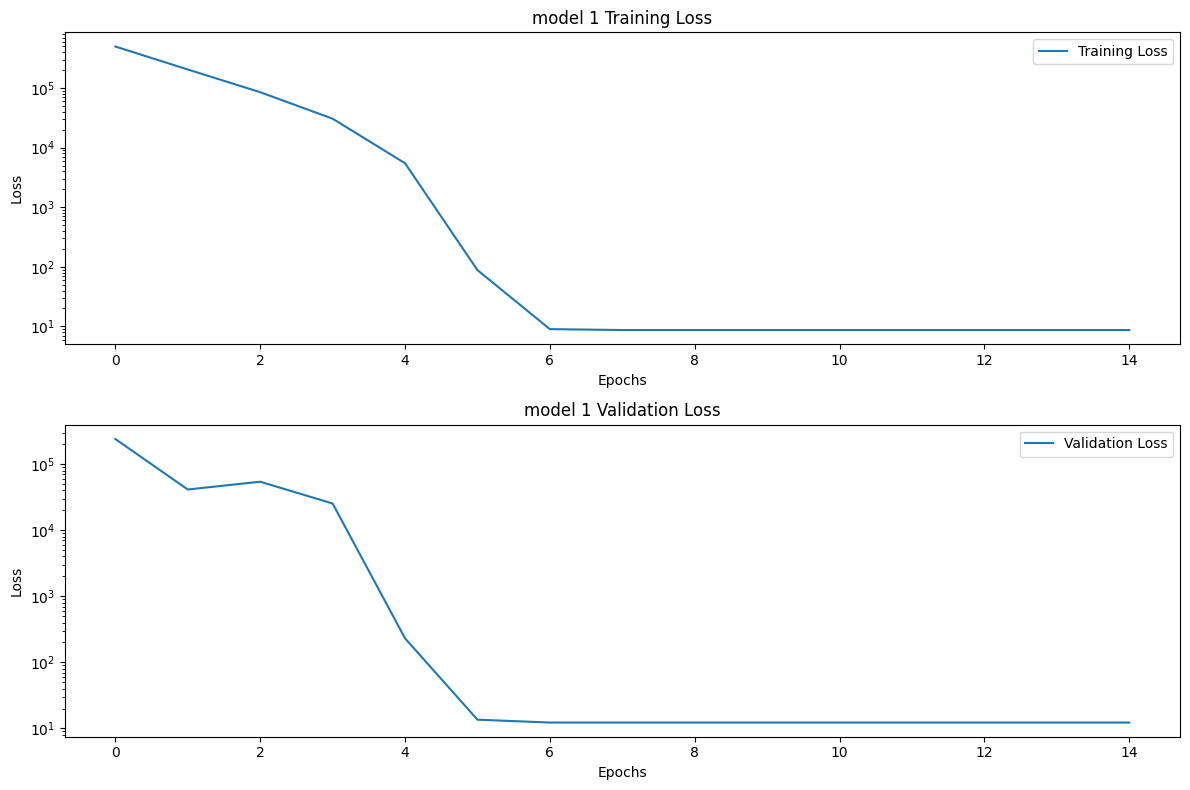

In [250]:
plot_loss(history_1, 'model 1')

In [251]:
def dynamic_model_2(X_train, y_train, X_valid, y_valid, epochs=40, batch_size=32):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(static_input_dim,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))

    # Compile the model
    model.compile(loss='mean_absolute_error', optimizer='adam')

    # Print the model summary
    model.summary()

    # Define the EarlyStopping and ModelCheckpoint callbacks
    early_stop = EarlyStopping(monitor='val_loss', patience=6)
    checkpoint = ModelCheckpoint('best_weights.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

    # Train the model
    history = model.fit(static_train_combined, y_train, epochs=epochs, batch_size=batch_size, validation_data=(static_validation_combined, y_valid), callbacks=[early_stop, checkpoint])

    return model, history

In [252]:
model_2, history_2 = dynamic_model_2(static_train_combined, y_train, static_validation_combined, y_valid)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 64)                7040      
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dense_25 (Dense)            (None, 1)                 33        
                                                                 
Total params: 9,153
Trainable params: 9,153
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
5336/5344 [============================>.] - ETA: 0s - loss: 240835.3281
Epoch 1: val_loss improved from inf to 709502.87500, saving model to best_weights.h5
5344/5344 [==============================] - 11s 2ms/step - loss: 241023.5156 - val_loss: 709502.8750
Epoch 2/40
5322/5344 [=======================

In [253]:
# Evaluate the model
test_loss = model_2.evaluate(static_test_combined, y_test)
print(f'Test loss: {test_loss}')

1393/1393 [==============================] - 2s 1ms/step - loss: 12.3509
Test loss: 12.350874900817871


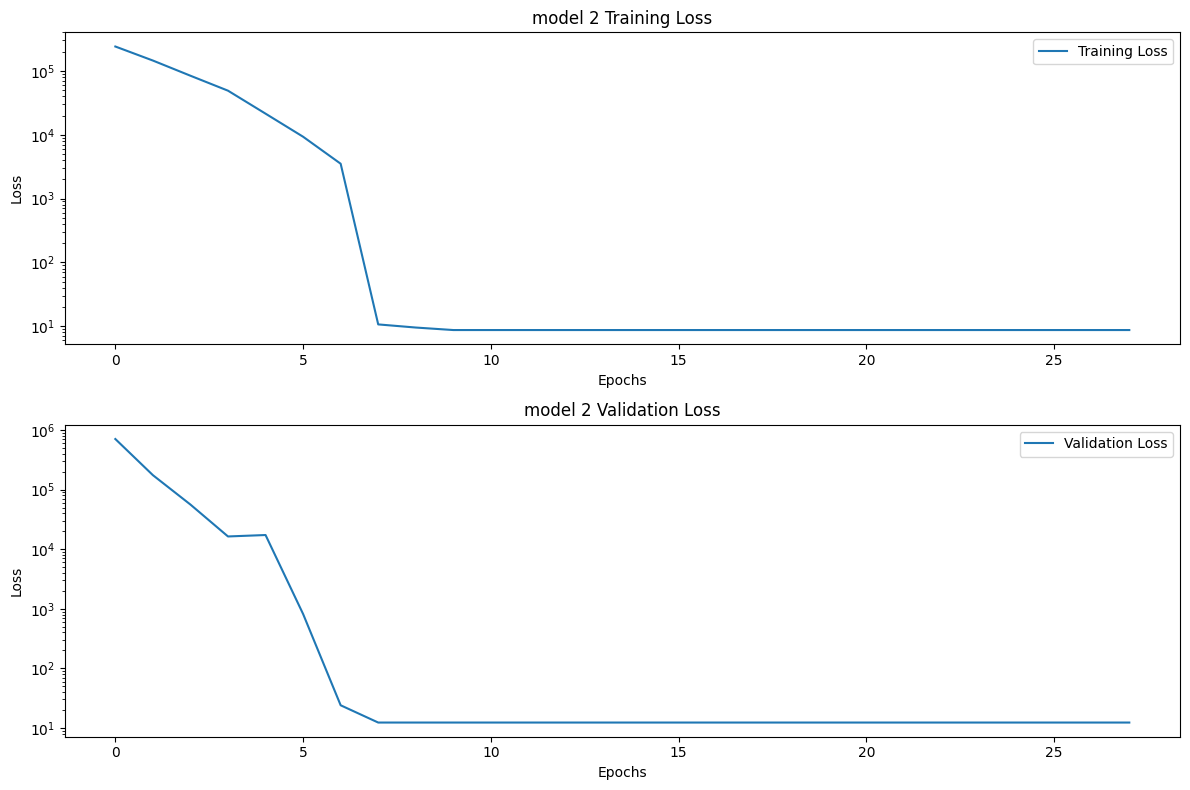

In [254]:
plot_loss(history_2, 'model 2')

In [255]:
def dynamic_model_3(X_train, y_train, X_valid, y_valid, epochs=40, batch_size=32):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(static_input_dim,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))

    # Compile the model
    model.compile(loss='mean_absolute_error', optimizer='adam')

    # Print the model summary
    model.summary()

    # Define the EarlyStopping and ModelCheckpoint callbacks
    early_stop = EarlyStopping(monitor='val_loss', patience=6)
    checkpoint = ModelCheckpoint('best_weights.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

    # Train the model
    history = model.fit(static_train_combined, y_train, epochs=epochs, batch_size=batch_size, validation_data=(static_validation_combined, y_valid), callbacks=[early_stop, checkpoint])

    return model, history

In [256]:
model_3, history_3 = dynamic_model_3(static_train_combined, y_train, static_validation_combined, y_valid)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 64)                7040      
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dense_28 (Dense)            (None, 16)                528       
                                                                 
 dense_29 (Dense)            (None, 1)                 17        
                                                                 
Total params: 9,665
Trainable params: 9,665
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
5339/5344 [============================>.] - ETA: 0s - loss: 84171.3438
Epoch 1: val_loss improved from inf to 17429.51172, saving model to best_weights.h5
5344/5344 [======

In [257]:
# Evaluate the model
test_loss = model_3.evaluate(static_test_combined, y_test)
print(f'Test loss: {test_loss}')

1393/1393 [==============================] - 2s 1ms/step - loss: 12.3535
Test loss: 12.353482246398926


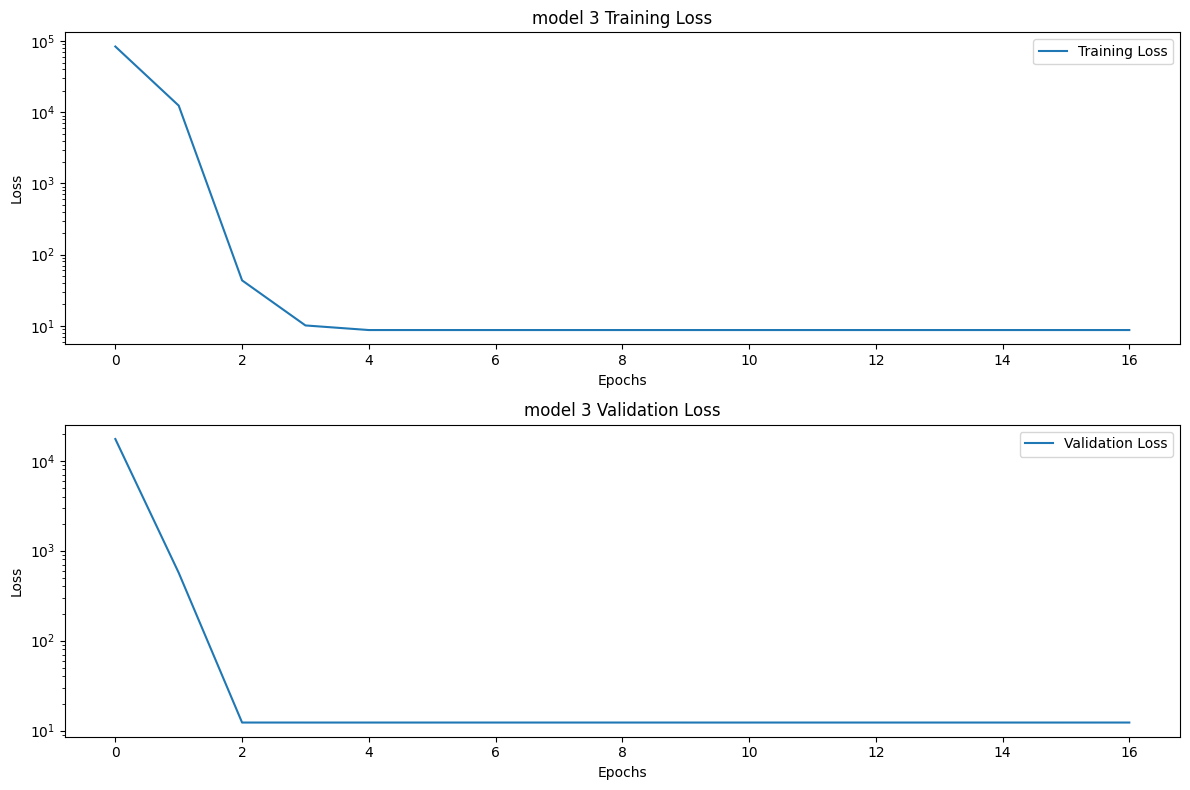

In [258]:
plot_loss(history_3, 'model 3')

In [259]:
def dynamic_model_4(X_train, y_train, X_valid, y_valid, epochs=40, batch_size=32):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(static_input_dim,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))

    # Compile the model
    model.compile(loss='mean_absolute_error', optimizer='adam')

    # Print the model summary
    model.summary()

    # Define the EarlyStopping and ModelCheckpoint callbacks
    early_stop = EarlyStopping(monitor='val_loss', patience=6)
    checkpoint = ModelCheckpoint('best_weights.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

    # Train the model
    history = model.fit(static_train_combined, y_train, epochs=epochs, batch_size=batch_size, validation_data=(static_validation_combined, y_valid), callbacks=[early_stop, checkpoint])

    return model, history

In [260]:
model_4, history_4 = dynamic_model_4(static_train_combined, y_train, static_validation_combined, y_valid)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 128)               14080     
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dense_32 (Dense)            (None, 16)                1040      
                                                                 
 dense_33 (Dense)            (None, 1)                 17        
                                                                 
Total params: 23,393
Trainable params: 23,393
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
5314/5344 [============================>.] - ETA: 0s - loss: 33002.9102
Epoch 1: val_loss improved from inf to 12.50073, saving model to best_weights.h5
5344/5344 [======

In [261]:
# Evaluate the model
test_loss = model_4.evaluate(static_test_combined, y_test)
print(f'Test loss: {test_loss}')

1393/1393 [==============================] - 2s 1ms/step - loss: 12.3509
Test loss: 12.350921630859375


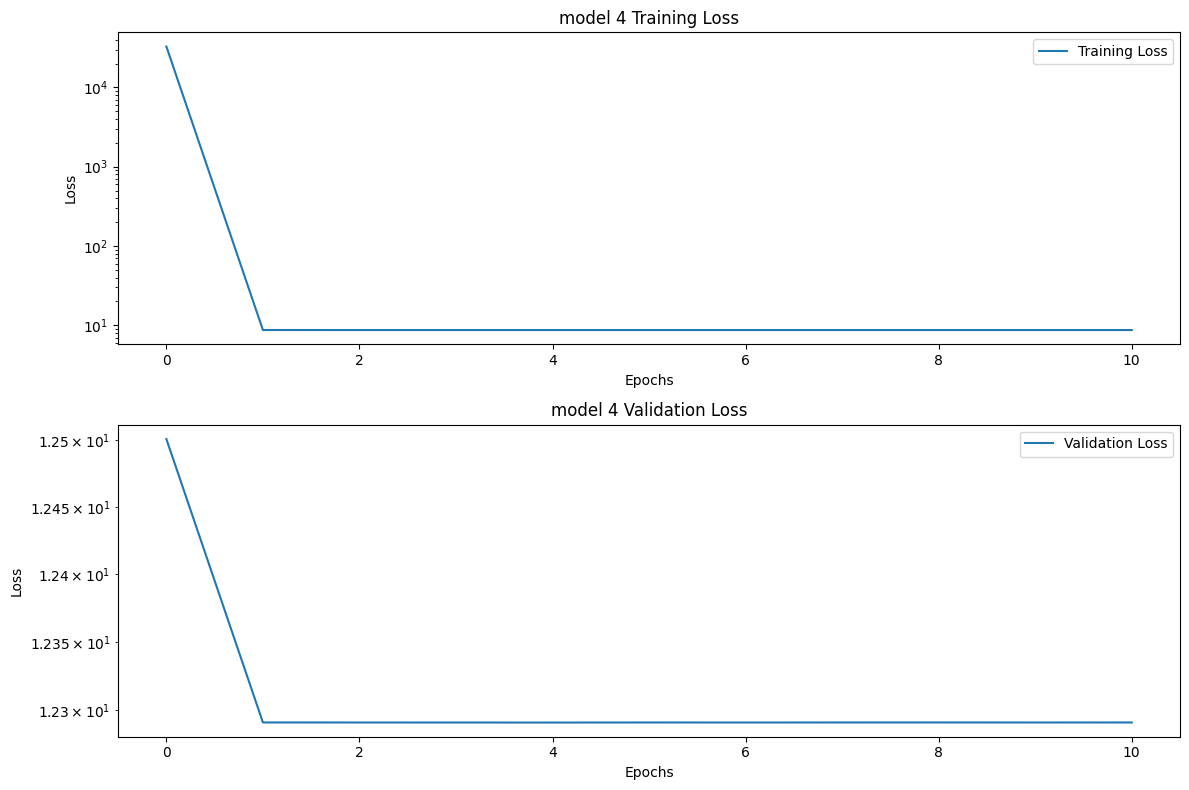

In [262]:
plot_loss(history_4, 'model 4')

In [263]:
def dynamic_model_5(X_train, y_train, X_valid, y_valid, epochs=40, batch_size=32):
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(static_input_dim,)))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))

    # Compile the model
    model.compile(loss='mean_absolute_error', optimizer='adam')

    # Print the model summary
    model.summary()

    # Define the EarlyStopping and ModelCheckpoint callbacks
    early_stop = EarlyStopping(monitor='val_loss', patience=6)
    checkpoint = ModelCheckpoint('best_weights.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

    # Train the model
    history = model.fit(static_train_combined, y_train, epochs=epochs, batch_size=batch_size, validation_data=(static_validation_combined, y_valid), callbacks=[early_stop, checkpoint])

    return model, history

In [264]:
model_5, history_5 = dynamic_model_5(static_train_combined, y_train, static_validation_combined, y_valid)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 32)                3520      
                                                                 
 dense_35 (Dense)            (None, 16)                528       
                                                                 
 dense_36 (Dense)            (None, 8)                 136       
                                                                 
 dense_37 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4,193
Trainable params: 4,193
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
5336/5344 [============================>.] - ETA: 0s - loss: 61021.7617
Epoch 1: val_loss improved from inf to 26604.49609, saving model to best_weights.h5
5344/5344 [=====

In [265]:
# Evaluate the model
test_loss = model_5.evaluate(static_test_combined, y_test)
print(f'Test loss: {test_loss}')

1393/1393 [==============================] - 2s 1ms/step - loss: 12.3509
Test loss: 12.350910186767578


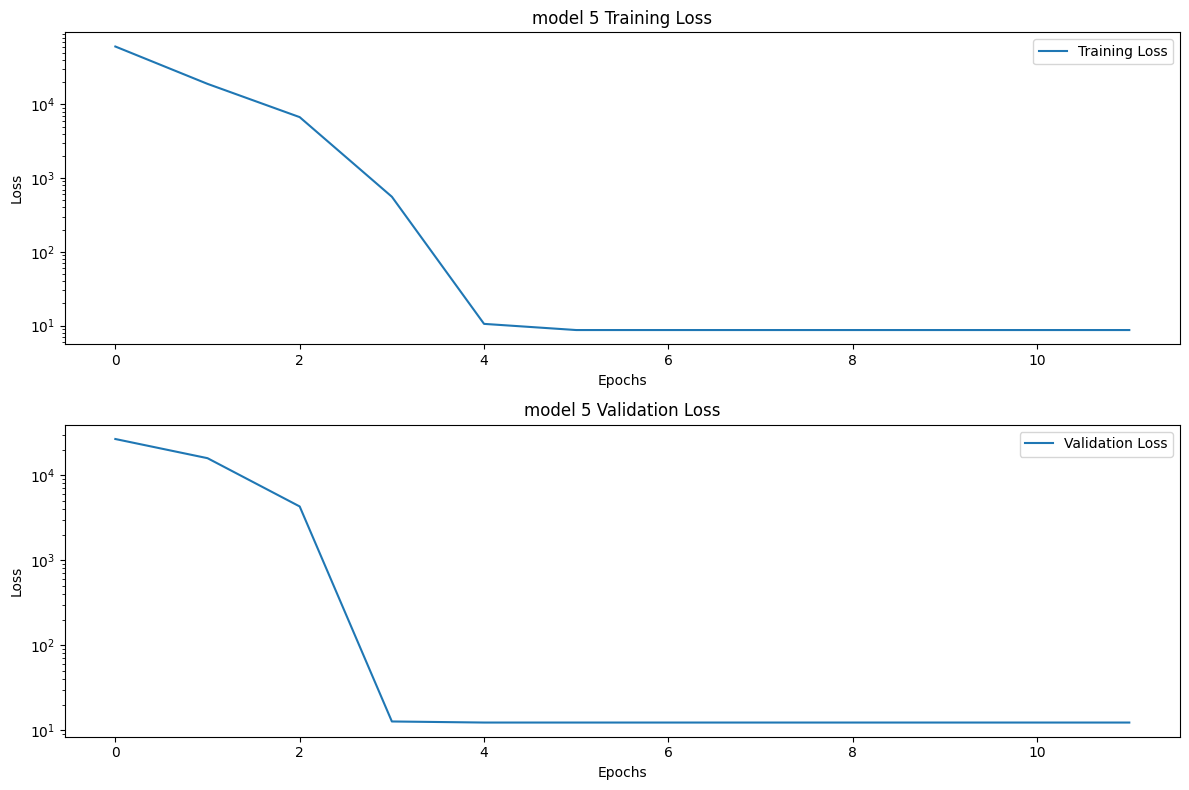

In [266]:
plot_loss(history_5, 'model 5')

In [267]:
#model_4.save('dense_model_dynamic.h5')
model_3.save('dense_model_dynamic.h5')
#model_2.save('dense_model_dynamic_1.h5')

In [268]:
dynamic_model = keras.models.load_model('dense_model_dynamic.h5')
dynamic_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 64)                7040      
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dense_28 (Dense)            (None, 16)                528       
                                                                 
 dense_29 (Dense)            (None, 1)                 17        
                                                                 
Total params: 9,665
Trainable params: 9,665
Non-trainable params: 0
_________________________________________________________________


In [269]:
mae = mean_absolute_error(y_test, y_pred)
mae

12.351780983657052

1393/1393 [==============================] - 2s 1ms/step


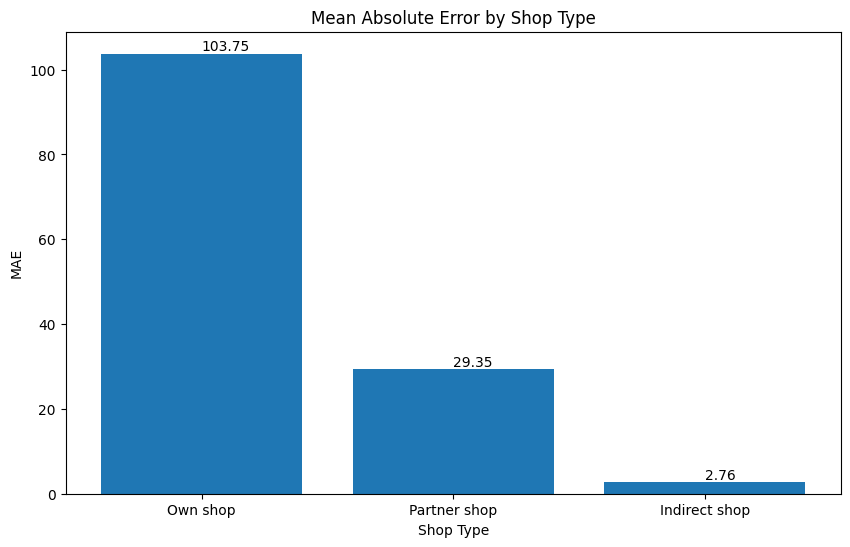

In [270]:
shop_type_mapping = {0: 'Indirect shop', 1: 'Own shop', 2: 'Partner shop'}

y_pred = dynamic_model.predict(static_test_combined)

mae_by_shop_type = {}
for shop_type in static_test_combined['shop_type'].unique():                                                       
    mask = static_test_combined['shop_type'] == shop_type
    mae = mean_absolute_error(y_test[mask], y_pred[mask])
    mae_by_shop_type[shop_type_mapping[shop_type]] = mae


sorted_data = sorted(mae_by_shop_type.items(), key=lambda x: x[1], reverse=True)
shop_types, mae_values = zip(*sorted_data)

x_ticks = range(len(shop_types))

plt.figure(figsize=(10, 6))
bars = plt.bar(x_ticks, mae_values)
plt.xlabel('Shop Type')
plt.ylabel('MAE')
plt.title('Mean Absolute Error by Shop Type')
plt.xticks(x_ticks, shop_types)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')
    
plt.show()

In [271]:
mae

103.75398750156965

In [272]:
mae_by_shop_type 

{'Partner shop': 29.35398366136445,
 'Indirect shop': 2.7582070231743208,
 'Own shop': 103.75398750156965}

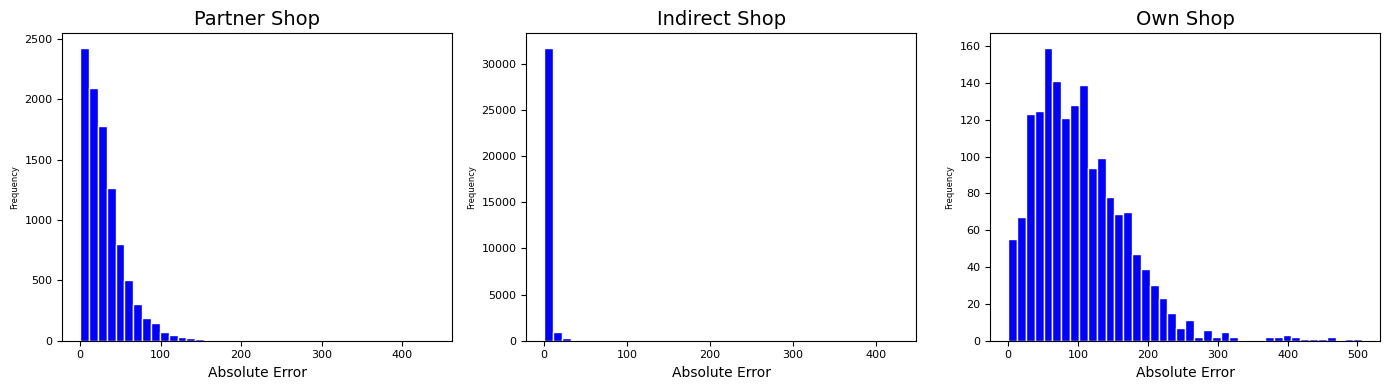

In [273]:
abs_error = np.abs(y_test - y_pred.flatten())

shop_types = static_test_combined['shop_type'].unique()

shop_type_names = ["Partner Shop", "Indirect Shop", "Own Shop"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,4))
axes = axes.flatten()

for i, shop_type in enumerate(shop_types):
    idx = static_test_combined['shop_type'] == shop_type
    axes[i].hist(abs_error[idx], bins=40, histtype="barstacked", color="blue", rwidth=6, edgecolor="white")
    axes[i].set_title(f"{shop_type_names[i]}", fontsize=14)
    axes[i].set_xlabel("Absolute Error", fontsize=10)
    axes[i].set_ylabel("Frequency", fontsize=6)
    axes[i].tick_params(axis='both', which='major', labelsize=8) 
    
plt.tight_layout()
plt.show()

In [274]:
def evaluate_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various metrics
    mae = tf.reduce_mean(tf.keras.metrics.mean_absolute_error(y_true, y_pred))
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) 
    mse = tf.reduce_mean(mse)
    rmse = tf.sqrt(mse)
    #mape = tf.reduce_mean(tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred))
    #mase = mean_absolute_scaled_error(y_true, y_pred)

    return {"mae": mae.numpy(),
            "mse": mse.numpy(),
            "rmse": rmse.numpy()}
            #"mape": mape.numpy()}
            #"mase": mase.numpy()}

In [275]:
def plot_metrics(metrics):
    names = list(metrics.keys())
    values = list(metrics.values())
    colors = ['blue', 'orange', 'green','Yellow']  

    plt.figure(figsize=(10, 5))
    plt.bar(names, values, color=colors)
    plt.title('Evaluation Metrics')
    plt.ylabel('Value')
    plt.ylim([0, max(values)*1.2])  
    plt.show()

In [276]:
metrics = evaluate_preds(y_test, y_pred)
metrics

{'mae': 12.353443, 'mse': 986.9785, 'rmse': 31.416214}

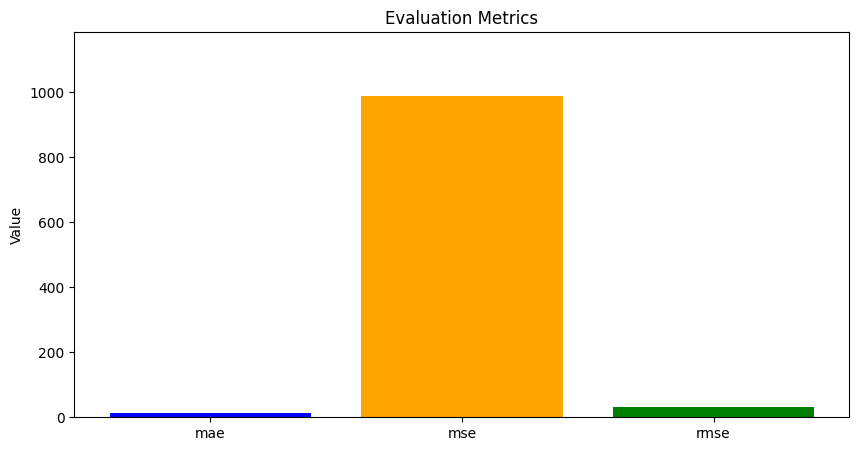

In [277]:
# Plot the metrics
plot_metrics(metrics)

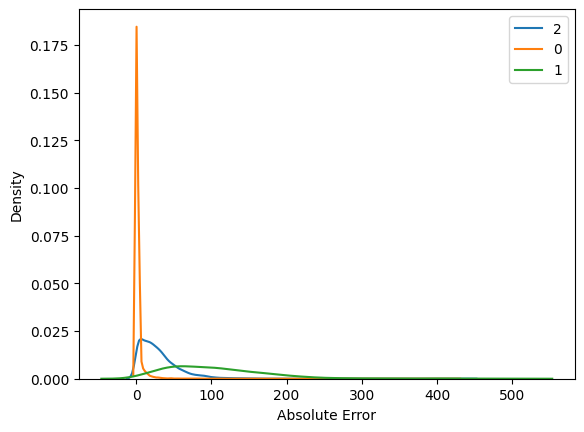

In [278]:
for shop_type in shop_types:
    idx = static_test_combined['shop_type'] == shop_type
    sns.kdeplot(abs_error[idx], label=shop_type)

plt.xlabel('Absolute Error')
plt.ylabel('Density')
plt.legend()
plt.show()

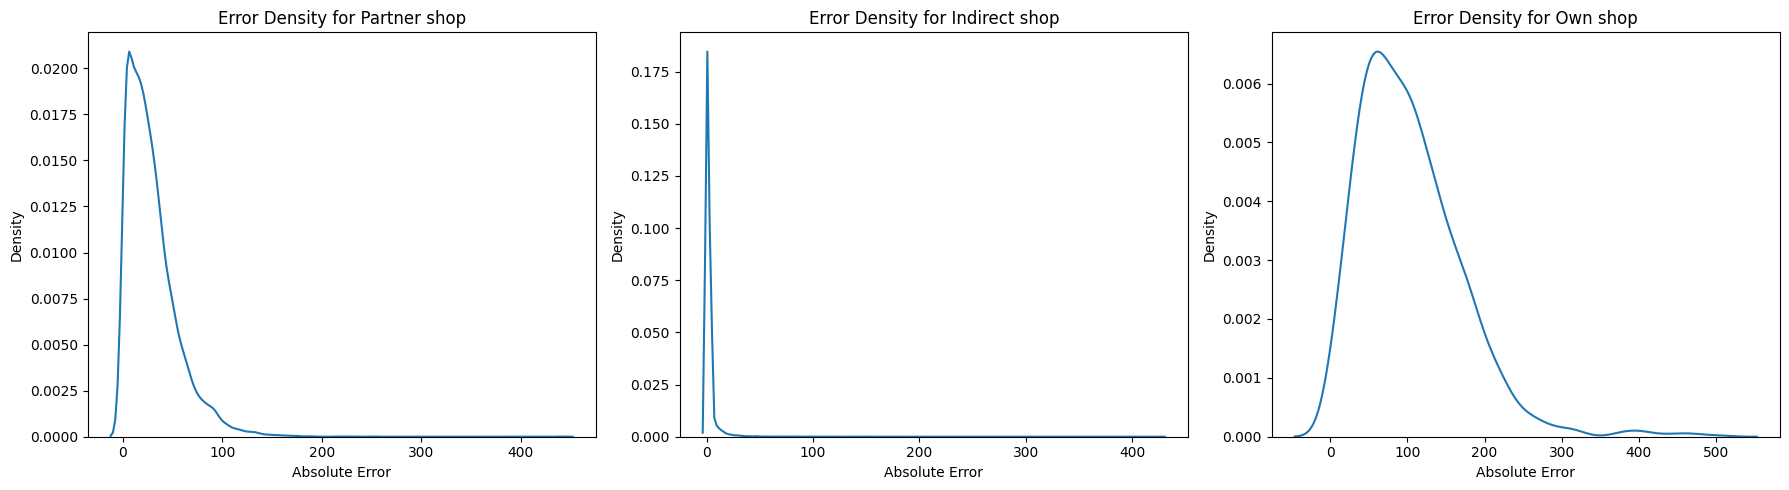

In [279]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5)) 
axes = axes.flatten()

shop_type_array = static_test_combined['shop_type'].unique()

# Mapping from encoded shop types to shop type names
shop_type_mapping = {0: 'Indirect shop', 1: 'Own shop', 2: 'Partner shop'}

for i, shop_type in enumerate(shop_type_array):
    idx = static_test_combined['shop_type'] == shop_type
    sns.kdeplot(abs_error[idx], ax=axes[i])
    axes[i].set_title(f"Error Density for {shop_type_mapping[shop_type]}")
    axes[i].set_xlabel("Absolute Error")
    axes[i].set_ylabel("Density")

plt.tight_layout()
plt.show()